### XGBoost Classification for Gas Burn Category.
<i> <b>Author:</b> Sheena Bagga, Mu Sigma </i> </br>
<i> <b>Date:</b> 04-December-2019 </i> </br>
<i> <b>Version:</b> 1.0 </i>

The purpose of the notebook is to perform Regression for predicting the Burn Category of a Unit on the Day level ADS created.

In [2]:
%sh 
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 RegscorePy
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 scikit-plot
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 imblearn
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 mlflow
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 xgboost
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 sklearn
/databricks/python/bin/pip install --proxy http://10.245.5.249:8080 yellowbrick

Requirement already satisfied: RegscorePy in /databricks/python3/lib/python3.6/site-packages (1.1)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.6/site-packages (from RegscorePy) (0.23.0)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.6/site-packages (from RegscorePy) (1.16.2)
Requirement already satisfied: python-dateutil>=2.5.0 in /databricks/python3/lib/python3.6/site-packages (from pandas->RegscorePy) (2.7.3)
Requirement already satisfied: pytz>=2011k in /databricks/python3/lib/python3.6/site-packages (from pandas->RegscorePy) (2018.4)
Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.6/site-packages (from python-dateutil>=2.5.0->pandas->RegscorePy) (1.11.0)
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already satisfied: scikit-plot in /databricks/python3/lib/python3.6/site-packages (0.3.7)
Requirement already satisfied: scipy>=0.9 in /databricks/python3/lib/python3.6/site-packages (from scikit-plot) (1.1.0)
Requirement already satisfied: matplotlib>=1.4.0 in /databricks/python3/lib/python3.6/site-packages (from scikit-plot) (2.2.2)
Requirement already satisfied: scikit-learn>=0.18 in /databricks/python3/lib/python3.6/site-packages (from scikit-plot) (0.22)
Requirement already satisfied: joblib>=0.10 in /databricks/python3/lib/python3.6/site-packages (from scikit-plot) (0.14.0)
Requirement already satisfied: numpy>=1.7.1 in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (1.16.2)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (2.2.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (2.7.3)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (2018.4)
Requirement already satisfied: six>=1.10 in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (1.11.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.6/site-packages (from matplotlib>=1.4.0->scikit-plot) (1.1.0)
Requirement already satisfied: setuptools in /databricks/python3/lib/python3.6/site-packages (from kiwisolver>=1.0.1->matplotlib>=1.4.0->scikit-plot) (39.1.0)
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already satisfied: imblearn in /databricks/python3/lib/python3.6/site-packages (0.0)
Requirement already satisfied: imbalanced-learn in /databricks/python3/lib/python3.6/site-packages (from imblearn) (0.6.0)
Requirement already satisfied: scipy>=0.17 in /databricks/python3/lib/python3.6/site-packages (from imbalanced-learn->imblearn) (1.1.0)
Requirement already satisfied: numpy>=1.11 in /databricks/python3/lib/python3.6/site-packages (from imbalanced-learn->imblearn) (1.16.2)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.6/site-packages (from imbalanced-learn->imblearn) (0.14.0)
Requirement already satisfied: scikit-learn>=0.22 in /databricks/python3/lib/python3.6/site-packages (from imbalanced-learn->imblearn) (0.22)
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already satisfied: mlflow in /databricks/python3/lib/python3.6/site-packages (1.0.0)
Requirement already satisfied: alembic in /databricks/python3/lib/python3.6/site-packages (from mlflow) (1.3.1)
Requirement already satisfied: click>=7.0 in /databri

In [3]:
# Importing the libraries

from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import datetime
import six
import mlflow
import mlflow.sklearn
from RegscorePy import *
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from hyperopt import hp
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import binarize
import scikitplot as skplt
import warnings
warnings.simplefilter(action='ignore')
import statsmodels.api as sm
from scipy import stats

In [4]:

hb1 = ["DAM","Gen_SP_15_Wind_forecasted_lead1","Gen_SP_15_Wind_actual_lag2","Gen_mojave_windspeedKmph_f","SCE_Load_SP_15_lag2","HB1_mmbtu_new_lag2","HB1_mmbtu_new"]


In [5]:
units = [hb1]

In [6]:
# Pulling the ADS from Blob via an SQL wrapper of PySpark command
adsDay = spark.sql("select * from mu_dispatch_opt.ADS_DayLevel_7December2019_master_v2")
type(adsDay)

# dataset contains the ADS at day level which is used for training
dataset = adsDay.toPandas()
validation = dataset.copy(deep = True)
print("dataset_shape : ",dataset.shape)

dataset = dataset[(dataset['Date'] >= '2017-01-01') & (dataset['Date'] <= '2019-06-30')]
print("dataset_shape : ",dataset.shape)

validation_data = spark.sql("select * from mu_dispatch_opt.ADS_DayLevel_8December2019_validation")
validation_data = validation_data.toPandas()
# validation_data  = validation[(validation['Date'] >= '2019-07-01') & (validation['Date'] <= '2019-10-29')]
print("validation_data_shape : ",validation_data.shape)

dataset_shape : (1030, 320)
dataset_shape : (909, 320)
validation_data_shape : (121, 332)

In [7]:
validation_data = validation_data[validation_data.HB1_predicted == 1]
print(validation_data.shape)

(99, 332)

In [8]:
# Dictionary to change categorical to numerical
fl = {
      "On":1,
      "Off":0,
  }

# Fixed random state 
random_State = 120

#model result structure
model_col = ['Iter','Unit', 'test_rmse', 'test_variance_score', 'test_mae', 'test_mse', 'test_r2', 'test_r2_adj','test_mape', 'test_aic', 'test_bic', 'val_rmse', 'val_variance_score', 'val_mae', 'val_mse', 'val_r2', 'val_r2_adj','val_mape', 'val_aic', 'val_bic', 'model_name']

# Store the all iteration results 
model_result_df = pd.DataFrame(columns=model_col)

#defining regressors
regressor0 = xgb.XGBRegressor(random_state=random_State)
regressor1 = DecisionTreeRegressor(random_state=random_State)
regressor2 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
regressor3 = RandomForestRegressor(max_depth=2, random_state=random_State, verbose=0, warm_start=False)
# regressor4 = PLSRegression(n_components=7)

regressors=[regressor0,regressor1,regressor2,regressor3]
# regressors=[regressor0]

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
# Dataframe to store y_pred and y_actual for test and validation
data_list = pd.DataFrame()
data_list1 = pd.DataFrame()
date_data = pd.DataFrame()

In [11]:
# CHANGE THE FILENAME EVERY TIME YOU RUN THIS CODE
# Saving model in DBFS
modelpath = "/dbfs/mnt/"
filename='sheena3_xgb_'

j=0

for cols in units:
  
  # Columns of the units
  flag = cols[-1] #Y variable
  
  # name of the unit 
  names =cols[-1]
  print("\n UNITNAME :===================================================================================================================== ",names)
  
  data = dataset[cols]
#   data['Consumer_Temperature_KBUR_actual_degreedays_lag2'] = 1/data['Consumer_Temperature_KBUR_actual_degreedays_lag2']
  data['Gen_SP_15_Wind_forecasted_lead1'] = np.log(data['Gen_SP_15_Wind_forecasted_lead1'])
  data['Gen_SP_15_Wind_actual_lag2'] = np.log(data['Gen_SP_15_Wind_actual_lag2'])
  data['Gen_mojave_windspeedKmph_f'] = np.log(data['Gen_mojave_windspeedKmph_f'])
#   data['Consumer_burbank_temp_f'] = np.log(data['Consumer_burbank_temp_f'])
#   data['Curtailed_MW_SCE'] = np.log(data['Curtailed_MW_SCE'])
  
  # subset for only ON scenarios
  data = data[(data[flag] > 0)]  
 
  # Selecting X and Y variables:
  X = data.iloc[:,:data.columns.get_loc(flag)].values
  y = data.iloc[:,data.columns.get_loc(flag)].values
  
  # VALIDATION DATA 
#   date_data = validation_data[(validation_data[flag] > 0)]['Date']
  date_data = validation_data['Date']
  print(date_data.shape)
  val_data = validation_data[cols]
#   val_data['TotCapacity_PlantFacingOutages'] = 1/val_data['TotCapacity_PlantFacingOutages']
  val_data['Gen_SP_15_Wind_forecasted_lead1'] = np.log(val_data['Gen_SP_15_Wind_forecasted_lead1'])
  val_data['Gen_SP_15_Wind_actual_lag2'] = np.log(val_data['Gen_SP_15_Wind_actual_lag2'])
  val_data['Gen_mojave_windspeedKmph_f'] = np.log(val_data['Gen_mojave_windspeedKmph_f'])
#   val_data['Consumer_burbank_temp_f'] = np.log(val_data['Consumer_burbank_temp_f'])
#   val_data['Curtailed_MW_SCE'] = np.log(val_data['Curtailed_MW_SCE'])
  
#   val_data = val_data[(val_data[flag] > 0)]
  
  # Selecting X and Y variables:
  val_X_test = val_data.iloc[:,:val_data.columns.get_loc(flag)].values
  val_y_test = val_data.iloc[:,val_data.columns.get_loc(flag)].values
  
  
  # TRAIN TEST Data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_State)
  
  for reg in regressors:
    
    X_train_std = X_train
    X_test_std = X_test
   
    if reg==regressor0:
        print("Running xgb")
        print("\n")
        param_grid = {
          'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'max_depth': [3, 4, 5]
        }

        grid = GridSearchCV(reg, param_grid, scoring='r2', cv=10)
        grid.fit(X_train_std, y_train)

        best_reg = grid.best_estimator_
        y_pred =  best_reg.predict(X_test_std)
        val_y_pred = best_reg.predict(val_X_test)

    else:    
        reg.fit(X_train_std,y_train)
        y_pred =  reg.predict(X_test_std)
        val_y_pred = reg.predict(val_X_test)

   
    name ='MODEL'

    if reg == regressor0:
      name = 'XGBOOST'
    elif reg == regressor1:
      name = 'DT'
    elif reg == regressor2:
      name = 'LINEAR REG'
    elif reg == regressor3:
      name = 'RF'     
    
    
    print("Regressor is",name)
    print("----------Test Results-------")
    mse_test = mean_squared_error(y_test, y_pred)
    print("MSE : ",mse_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
    print("RMSE : ",rmse_test)
    var_test = explained_variance_score(y_test, y_pred)
    print("VAR : ",var_test)
    mae_test = mean_absolute_error(y_test, y_pred)
    print("MAE : ",mae_test)
    r2_test = r2_score(y_test, y_pred)
    print("R2 : ",r2_test)
    r2adj_test = 1 - (((1 - r2_test) * (y_pred.__len__() - 1))/(y_pred.__len__() - (len(cols)-1) - 1))
    print("R2 Adj : ",r2adj_test)
    mape_test = mean_absolute_percentage_error(y_test,y_pred)
    print("MAPE : ",mape_test)
    aic_test = aic.aic(y_test.tolist(),y_pred.tolist(), (len(cols)-1))
    print("AIC : ",aic_test)
    bic_test = bic.bic(y_test.tolist(),y_pred.tolist(), (len(cols)-1))
    print("BIC : ",bic_test)
    data_test = pd.DataFrame({'Iter':j,'predicted':y_pred.tolist(),'Actual':y_test.tolist(),'Model':str(reg)})                    
    print("\n")
   

    print("----------Validation Results-------")
    mse_val = mean_squared_error(val_y_test,val_y_pred) 
    print("MSE : ",mse_val)
    rmse_val = np.sqrt(mean_squared_error(val_y_test,val_y_pred))
    print("RMSE : ",rmse_val)
    var_val = explained_variance_score(val_y_test,val_y_pred)
    print("VAR : ",var_val)
    mae_val = mean_absolute_error(val_y_test,val_y_pred)
    print("MAE : ",mae_val)
    r2_val = r2_score(val_y_test,val_y_pred)
    print("R2 : ",r2_val)
    r2adj_val = 1 - (((1 - r2_val) * (val_y_pred.__len__() - 1))/(val_y_pred.__len__() - (len(cols)-1) - 1))
    print("R2 Adj : ",r2adj_val)
    mape_val = mean_absolute_percentage_error(val_y_test,val_y_pred)
    print("MAPE : ",mape_val)
    aic_val = aic.aic(val_y_test.tolist(),val_y_pred.tolist(), (len(cols)-1))
    print("AIC : ",aic_val)
    bic_val = bic.bic(val_y_test.tolist(), val_y_pred.tolist(), (len(cols)-1))
    print("BIC : ",bic_val)
    data_val = pd.DataFrame({'Date':date_data,'Unit':names,'Iter':j,'predicted':val_y_pred.tolist(),'Actual':val_y_test.tolist(),'Model':str(reg)})
    print("\n")
    
    data_list = data_list.append(data_test)
    data_list1 = data_list1.append(data_val)
    
    row =[j,names,rmse_test,var_test,mae_test,mse_test,r2_test,r2adj_test,mape_test,aic_test,bic_test,rmse_val,var_val,mae_val,mse_val,r2_val,r2adj_val,mape_val,aic_val,bic_val,name]
    model_result_df.loc[j] = row
    j = j+1
  

UNITNAME :===================================================================================================================== HB1_mmbtu_new
(99,)
Running xgb


[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:24] WARNING: /workspa

In [12]:
display(model_result_df)

Iter,Unit,test_rmse,test_variance_score,test_mae,test_mse,test_r2,test_r2_adj,test_mape,test_aic,test_bic,val_rmse,val_variance_score,val_mae,val_mse,val_r2,val_r2_adj,val_mape,val_aic,val_bic,model_name
0,HB1_mmbtu_new,5519.830914776541,0.4891556250306931,4304.216833010916,3.0468533327722825E7,0.4422847282939224,0.3883122826449471,87.68211599851485,1201.0221460240882,1214.4267850516717,7851.785801800249,0.2842622771496469,6658.957679269633,6.1650540277351975E7,-0.5082389701383034,-0.6066023812342798,Infinity,1787.7622625647539,1803.3329816655614,XGBOOST
1,HB1_mmbtu_new,7158.723392148537,0.12068202011413998,5362.338113557972,5.124732060529465E7,0.061936686345692604,-0.02884363433053072,80.72686769650417,1236.899998668322,1250.3046376959055,9640.877543567747,-0.4202459022105054,7409.75045859293,9.294651981006886E7,-1.2738740436923055,-1.4221701769765862,Infinity,1828.4059481604777,1843.9766672612852,DT
2,HB1_mmbtu_new,5947.170174384013,0.37501382413833606,4497.065726990061,3.536883308308277E7,0.3525865475477191,0.28993363279427264,127.46829561255029,1211.3125682557297,1224.7172072833132,7788.330291195196,0.346585795549625,6432.607119986203,6.065808872474864E7,-0.4839593109353735,-0.5807392659963759,Infinity,1786.1555916211505,1801.726310721958,LINEAR REG
3,HB1_mmbtu_new,6283.054885406289,0.31702246727183325,4963.460376740124,3.947677869302783E7,0.27739211736752745,0.20746232227406236,141.2076729792286,1218.8943991310473,1232.2990381586308,8042.932798075299,0.27474503391032057,6828.93265724847,6.468876799435536E7,-0.5825671661658443,-0.6857780683070949,Infinity,1792.5247161646187,1808.0954352654262,RF


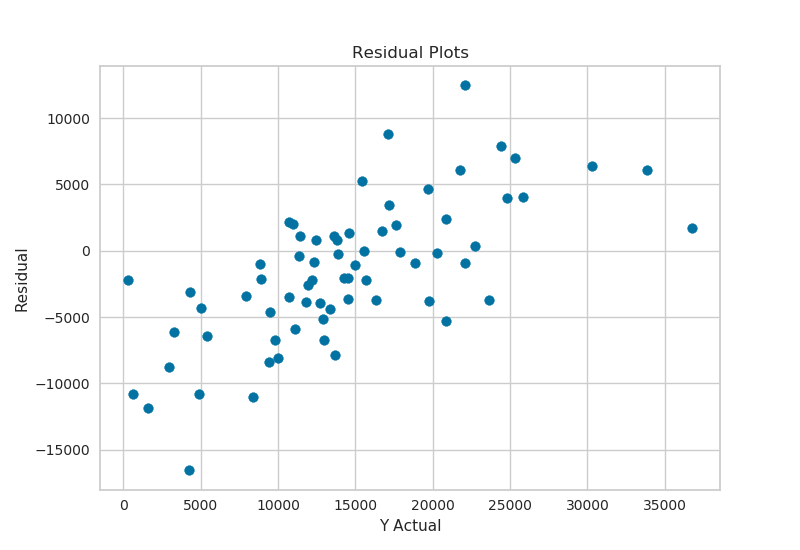

In [13]:
#residual plot
residual = y_test-y_pred
plt.scatter(y_test,residual)
plt.xlabel("Y Actual")
plt.ylabel("Residual")
plt.title("Residual Plots")
display(plt.show())
plt.clf()

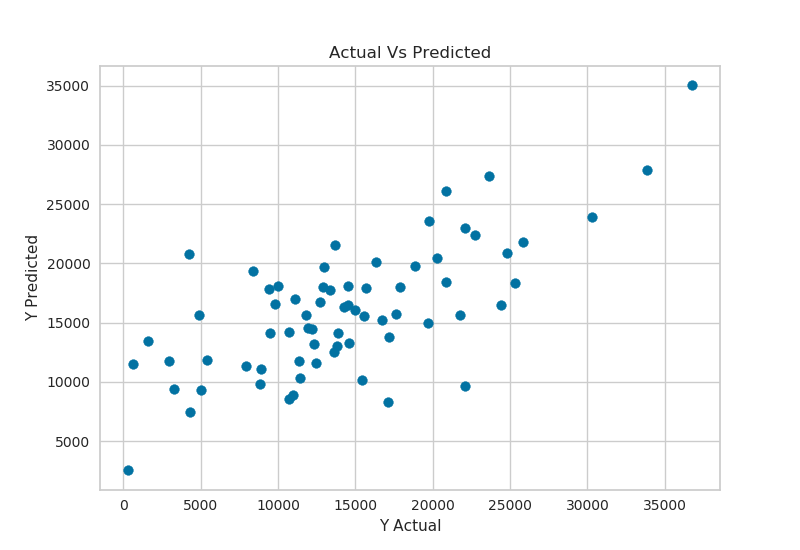

In [14]:
#comapring y_pred and y_actual
plt.scatter(y_test,y_pred)
plt.xlabel("Y Actual")
plt.ylabel("Y Predicted")
plt.title("Actual Vs Predicted")
display(plt.show())
plt.clf()

In [15]:
a = pd.DataFrame(y_test)
b = pd.DataFrame(y_pred)
c = pd.merge(a,b,left_index=True, right_index=True)
display(c)

0_x,0_y
16567.0375215,16868.6484375
12841.0251138,18021.802734375
12370.632451599999,9382.474609375
21580.7814579,11514.4970703125
16557.3830561,16419.20703125
15147.965570800001,15785.80078125
17074.955218900002,14674.986328125
10737.815378500001,15555.0361328125
12196.618616199998,17929.26171875
13194.922765899999,12504.955078125


In [16]:
a = pd.DataFrame(val_y_test)
b = pd.DataFrame(val_y_pred)
c = date_data.reset_index(drop = True)
c = pd.DataFrame(c)
d = pd.merge(c,a,left_index=True, right_index=True)
e = pd.merge(d,b,left_index=True, right_index=True)
display(e)

Date,0_x,0_y
2019-07-31T00:00:00.000+0000,11217.5943154,17298.736328125
2019-08-01T00:00:00.000+0000,558.74,16867.103515625
2019-08-02T00:00:00.000+0000,16619.41,18866.158203125
2019-08-03T00:00:00.000+0000,16895.04,20885.20703125
2019-08-04T00:00:00.000+0000,6815.920000000001,15452.6787109375
2019-08-05T00:00:00.000+0000,14593.62,19430.7890625
2019-08-06T00:00:00.000+0000,13828.779999999999,20405.796875
2019-08-07T00:00:00.000+0000,13826.640000000001,16894.5078125
2019-08-08T00:00:00.000+0000,11118.18,18203.619140625
2019-08-09T00:00:00.000+0000,9801.480000000001,18772.06640625
